In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('bank-additional.csv',sep=';')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
mapping = {'no':0,'yes':1}

In [7]:
data.y = data.y.replace(mapping)

In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [17]:
import seaborn as sns

In [23]:
?sns.pairplot

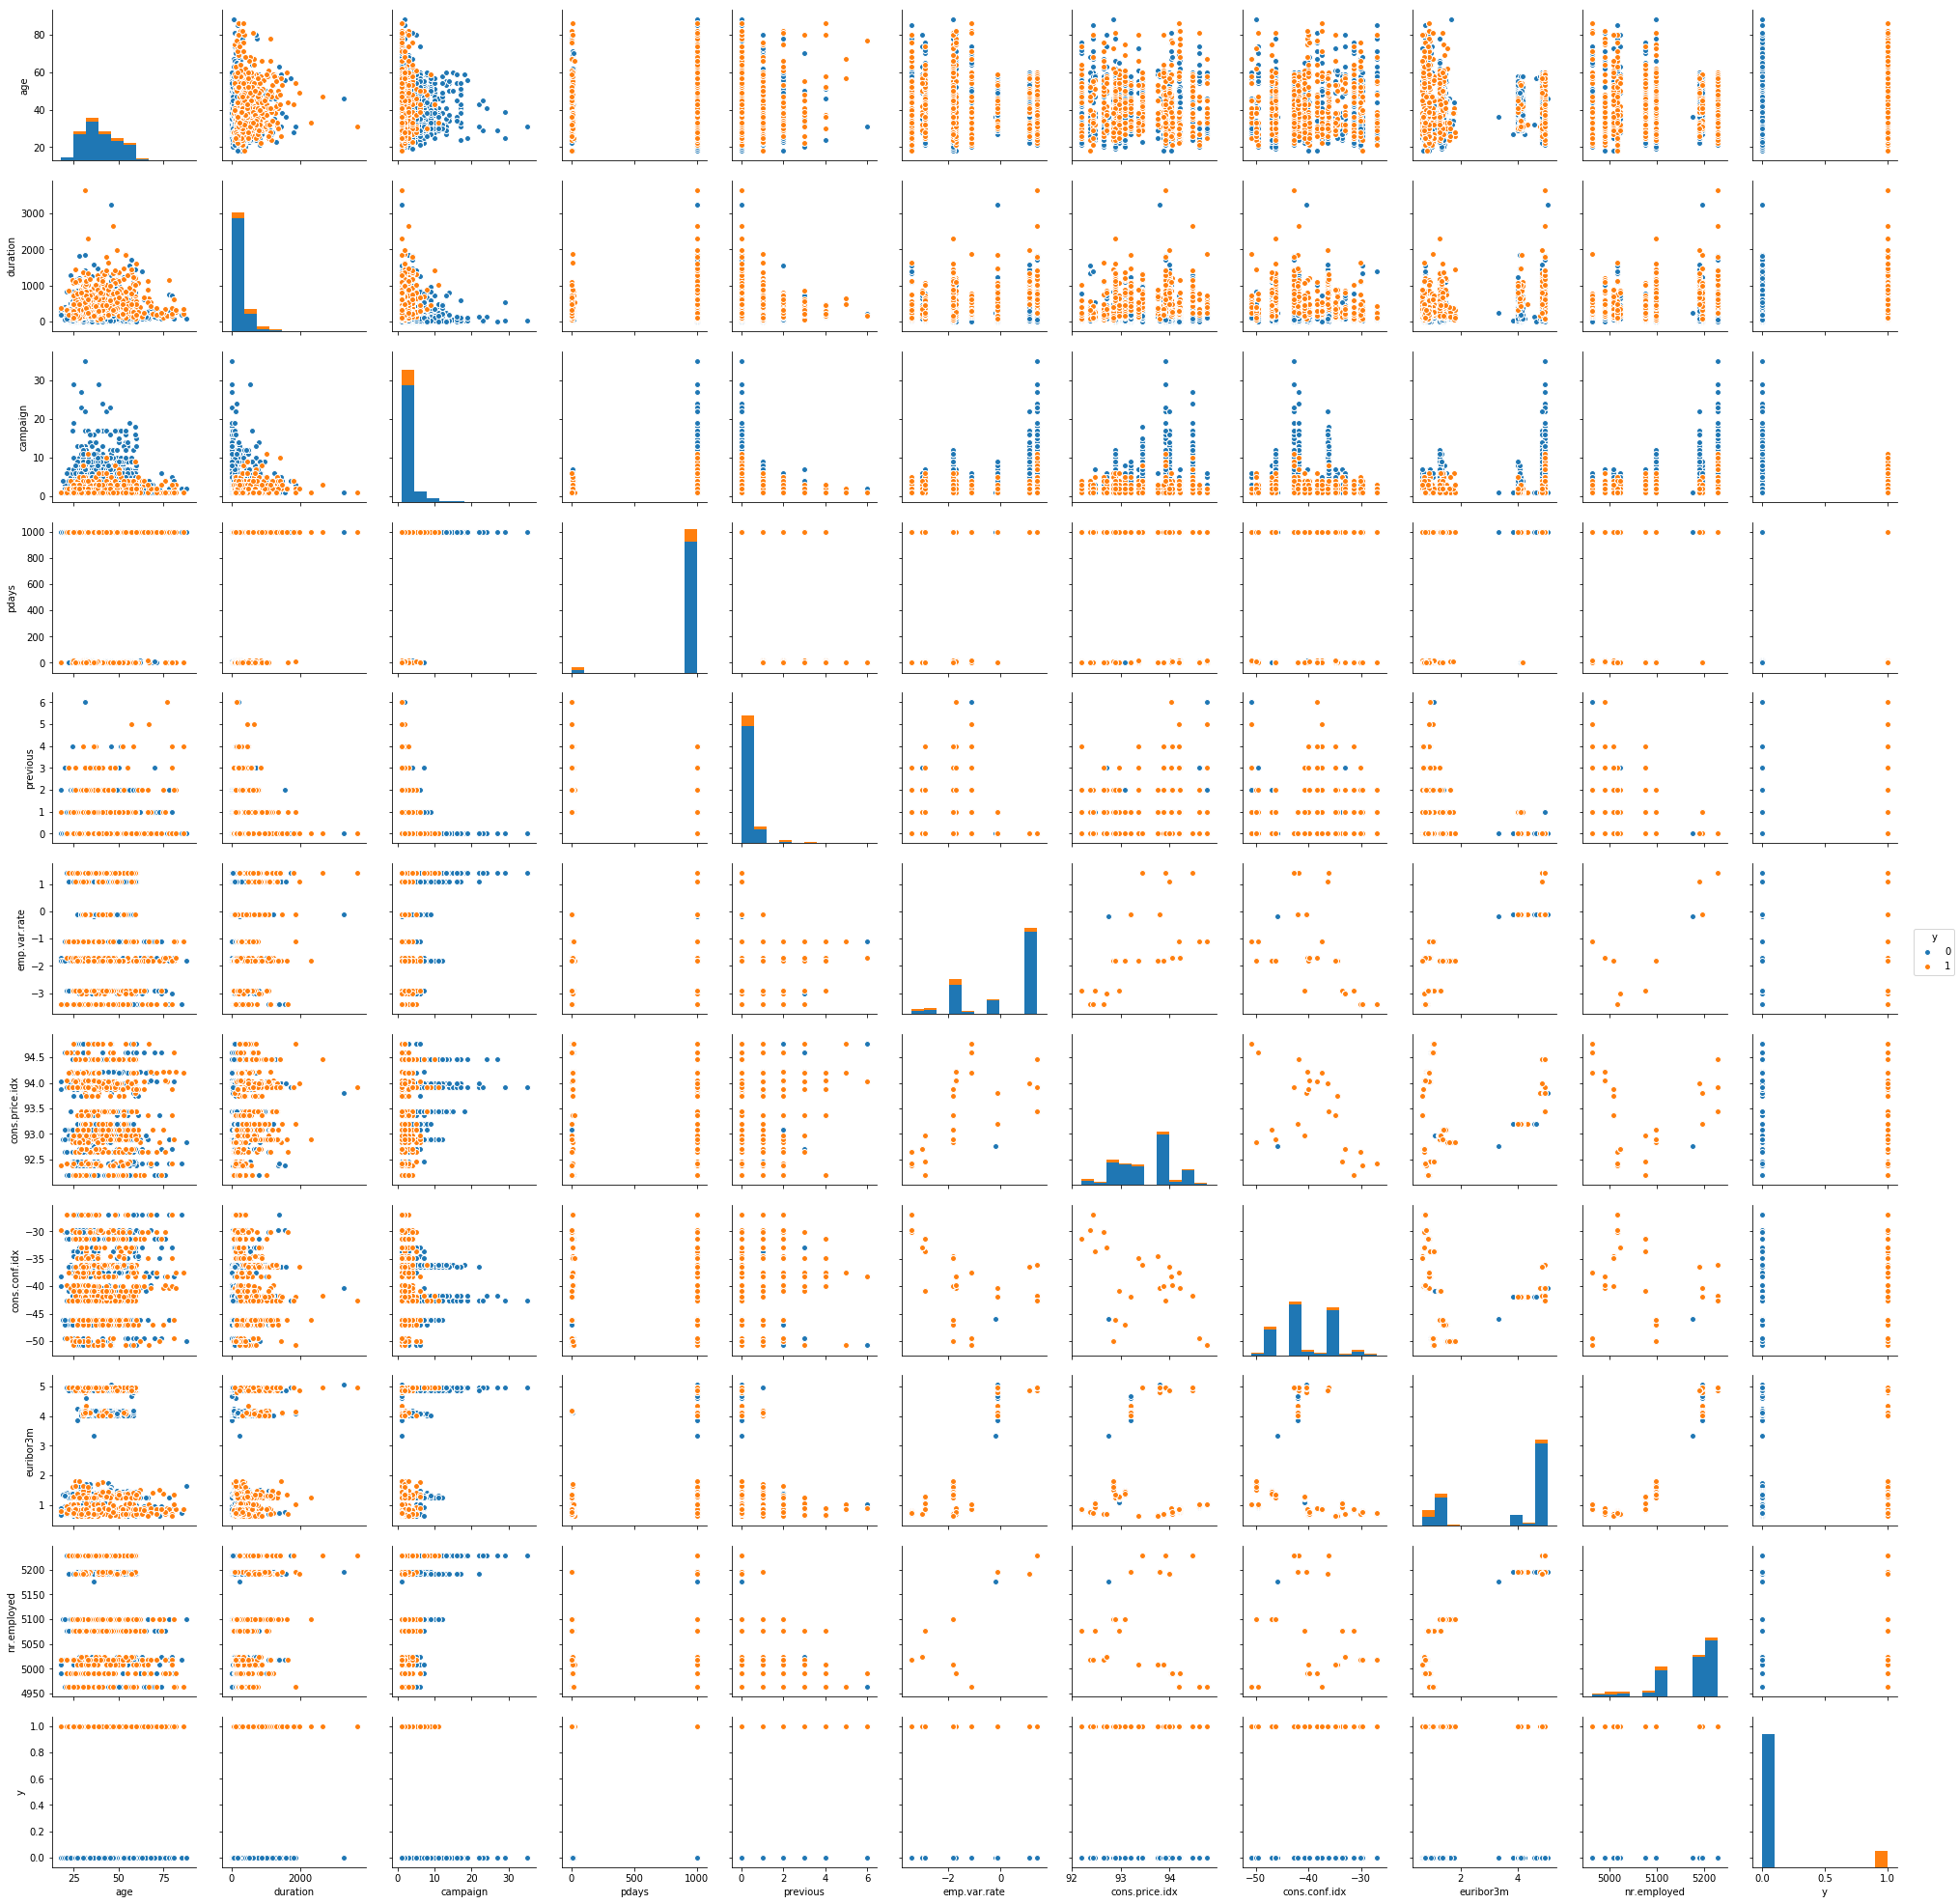

In [27]:
plt.rcParams['figure.figsize']=(20,20)
sns.pairplot(data=data,hue='y',size=2.5,aspect=1)

In [10]:
correlation_matrix = data.corr()

In [12]:
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [13]:
import matplotlib.pyplot as plt

## Proof that we do not have an issue of Multicollinearity

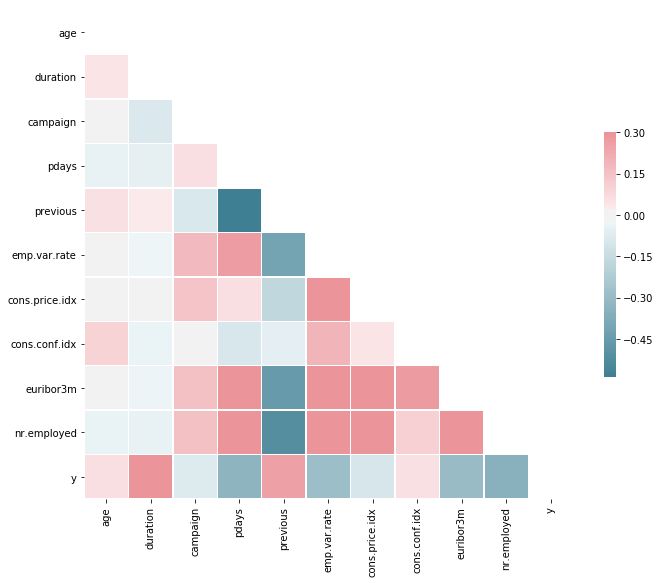

In [16]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Marital Status v/s Subscription to term deposit

marital
divorced    10.827871
married     60.912843
single      27.992231
unknown      0.267055
dtype: float64


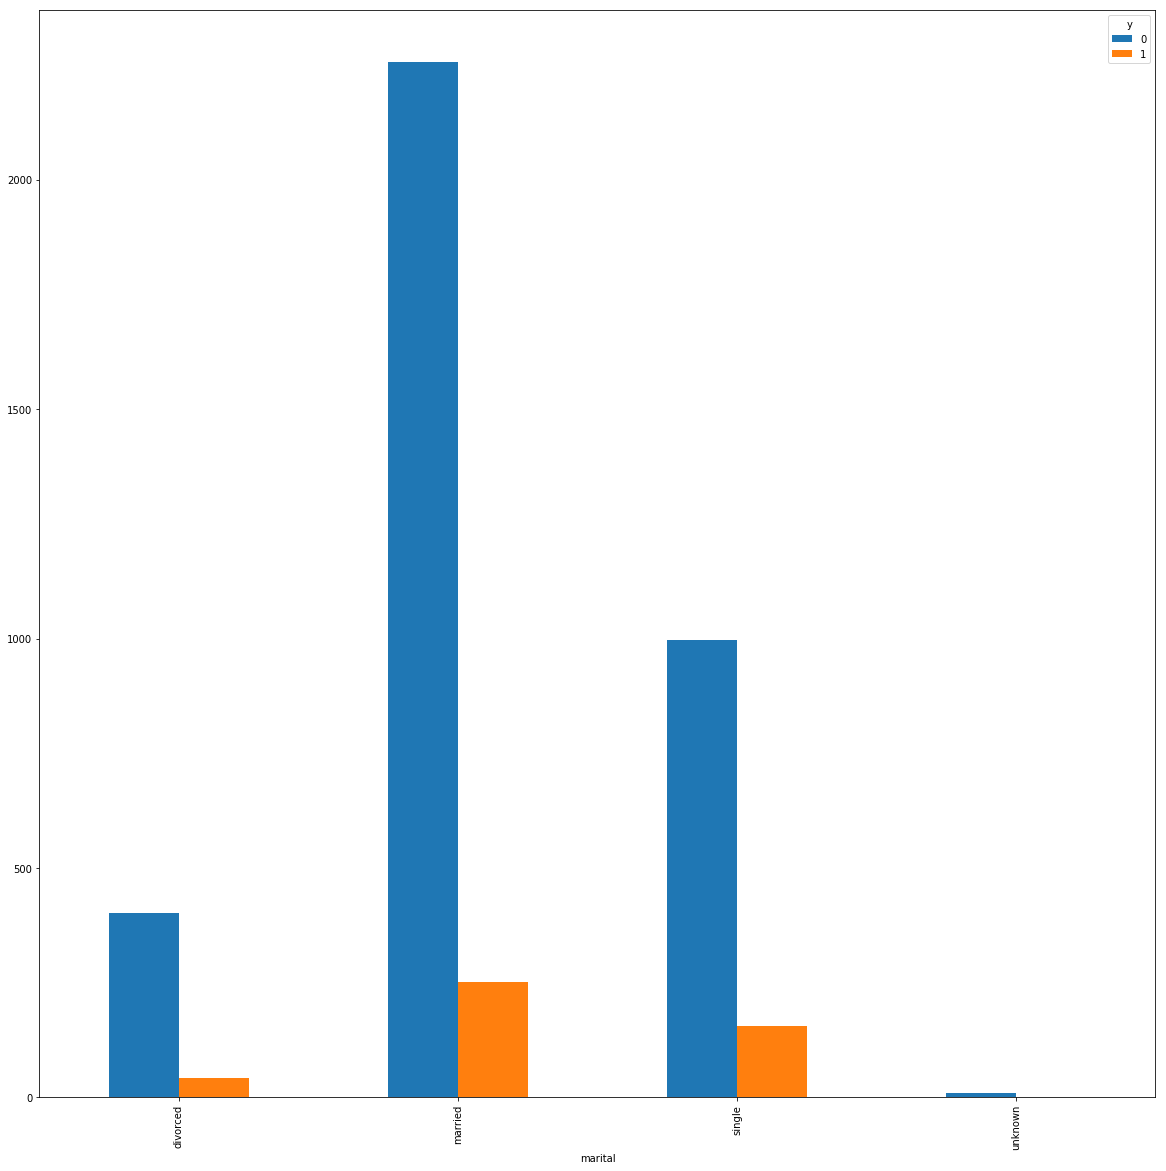

In [28]:
temp1 = pd.crosstab(data['marital'], data['y'])
temp1.plot(kind='bar')
print(data.groupby(['marital']).size()/len(data)*100)

## Housing status v/s subscription to term deposit

housing
no         44.646759
unknown     2.549162
yes        52.804079
dtype: float64


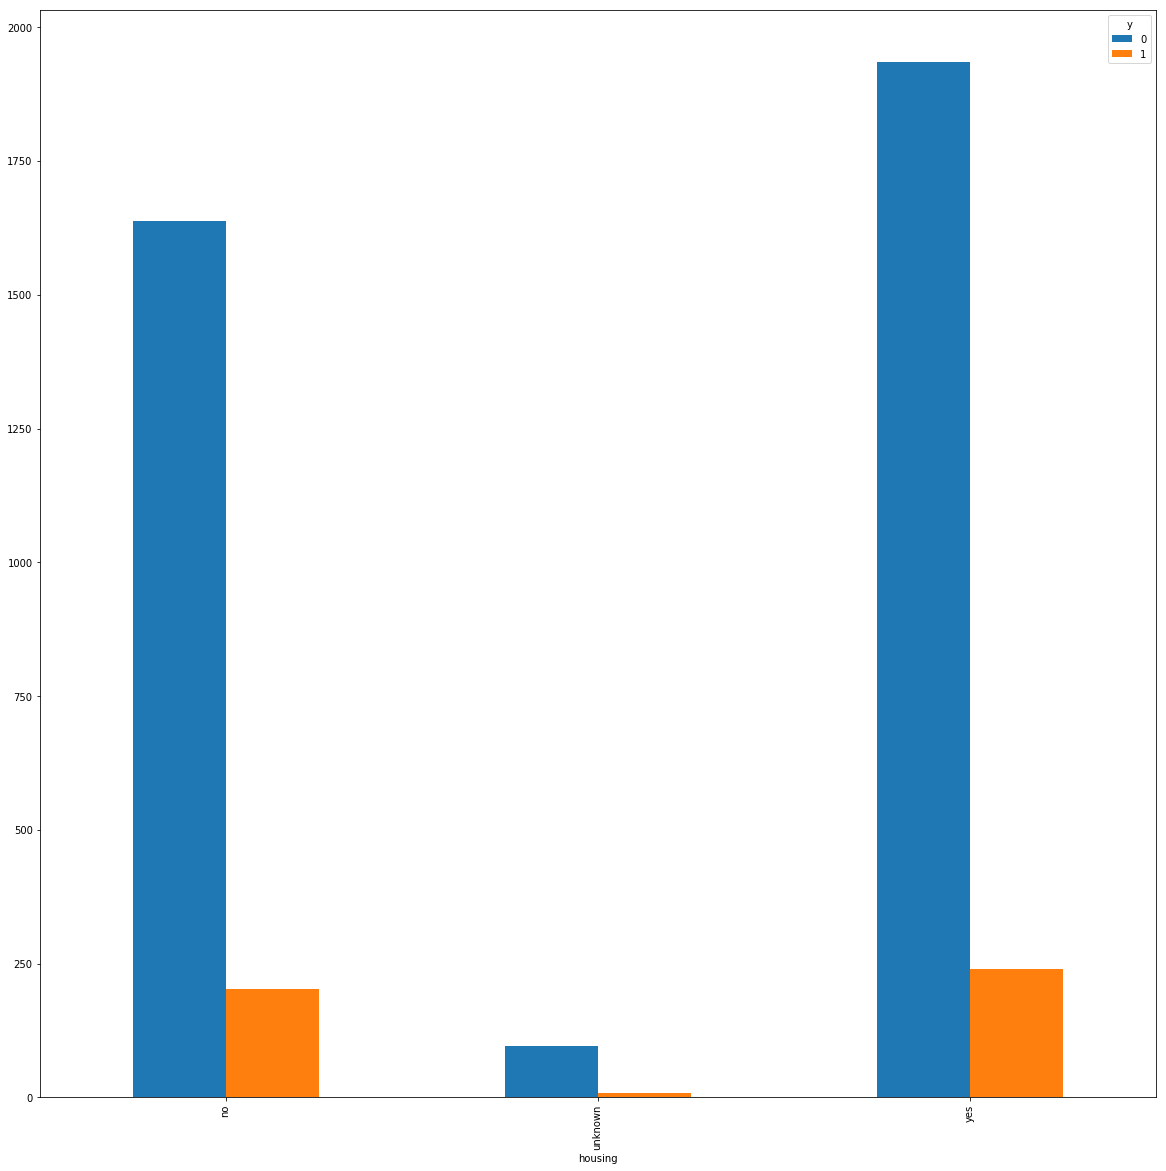

In [29]:
temp5 = pd.crosstab(data['housing'], data['y'])
temp5.plot(kind='bar')
print(data.groupby(['housing']).size()/len(data)*100)

## Duration Of calls v/s subscription to term deposit

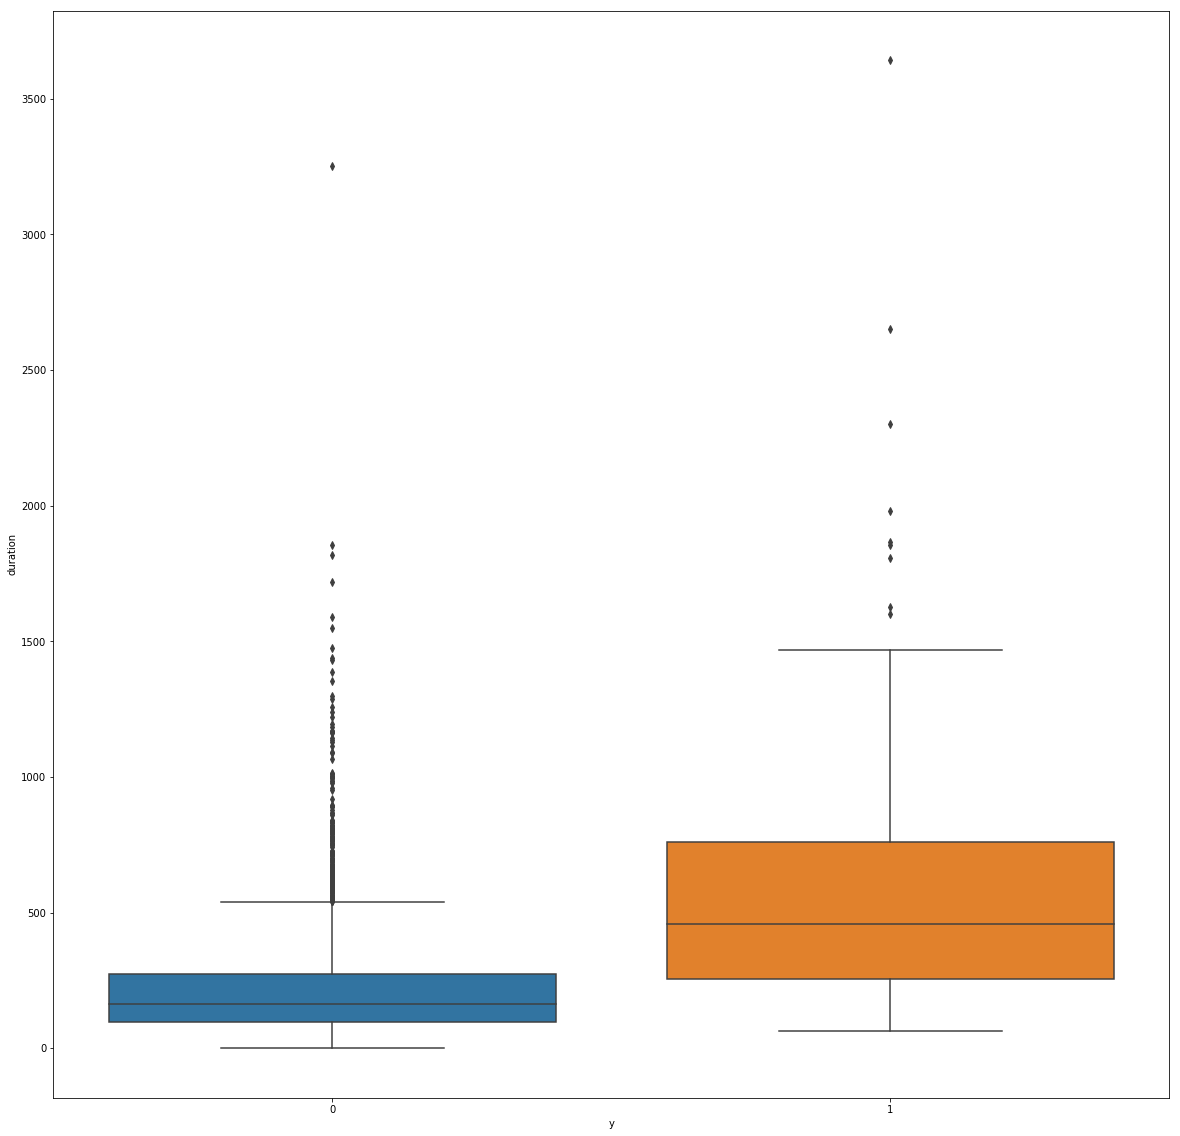

In [33]:
sns.boxplot(x='y', y='duration', data=data)

+ we see that the median duration of calls that succeded in making a person subscribe to term deposit were significantly longer than those that did not